In [1]:
import pandas as pd
from datetime import datetime
import numpy as np 
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_final  = pd.read_csv('Datasets/final_merged_train_df.csv')
df_final.head()

,Unnamed: 0,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,...,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,...,2017-07-04 17:59:36.000000,301964962.0,2.0,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30.0,8a858899538ddb8e0153a780c56e34bb,Good
1,1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,...,2017-07-10 08:42:44.000000,301972172.0,2.0,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30.0,NaN,Bad
2,2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,...,2017-07-11 10:02:11.000000,301976271.0,4.0,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30.0,NaN,Good
3,3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,...,2017-07-18 19:14:05.000000,301997763.0,2.0,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0,11500.0,15.0,NaN,Good
4,4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculating the Age using the birthdate

In [2]:
df_final.dtypes

Unnamed: 0                      int64
customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
No_of_prevloans               float64
Total_amount_borrowed         float64
Total_amount_due              float64
Average_termdays              float64
most_referredby                object
last_approveddate              object
last_creationdate              object
last_closeddate                object
last_firstduedate              object
last_firstrepaiddate           object
systemloanid                  float64
loannumber                    float64
approveddate                   object
creationdate                   object
loanamount                    float64
totaldue                      float64
termdays    

In [3]:
df_final['birthdate'] = pd.to_datetime(df_final['birthdate'])

#we divide by 365.25 to account for leap years
df_final['age'] = (datetime.now() - df_final['birthdate']).dt.days / 365.25

#truncate the age
df_final['age'] = df_final['age'].apply(np.floor)

#drop the birthdate column
df_final.drop('birthdate', axis=1, inplace=True)

df_final.head()

,Unnamed: 0,customerid,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,...,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,age
0,0,8a858e135cb22031015cbafc76964ebd,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1.0,...,301964962.0,2.0,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30.0,8a858899538ddb8e0153a780c56e34bb,Good,50.0
1,1,8a858e275c7ea5ec015c82482d7c3996,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1.0,...,301972172.0,2.0,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30.0,NaN,Bad,38.0
2,2,8a858e5b5bd99460015bdc95cd485634,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,3.0,...,301976271.0,4.0,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30.0,NaN,Good,37.0
3,3,8a858efd5ca70688015cabd1f1e94b55,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,1.0,...,301997763.0,2.0,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0,11500.0,15.0,NaN,Good,32.0
4,4,8a858e785acd3412015acd48f4920d04,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0


1 Hot Encoding the Bank_account_type and the Bank_name_clients

In [4]:
# view the unique values in the bank_account_type column and the bank_name_clients column
print(df_final['bank_account_type'].unique())
print(df_final['bank_name_clients'].unique())

# wondering if we can drop the bank_name_clients column

#one hot encode the bank_account_type column
df_final = pd.get_dummies(df_final, columns=['bank_account_type'])  # **drop_first=True to avoid multicollinearity
df_final.head()

['Savings' 'Other' 'Current']
['GT Bank' 'Sterling Bank' 'Fidelity Bank' 'Access Bank' 'EcoBank' 'FCMB'
 'Skye Bank' 'UBA' 'Zenith Bank' 'Diamond Bank' 'First Bank' 'Union Bank'
 'Stanbic IBTC' 'Standard Chartered' 'Heritage Bank' 'Keystone Bank'
 'Unity Bank' 'Wema Bank']


,Unnamed: 0,customerid,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,...,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings
0,0,8a858e135cb22031015cbafc76964ebd,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1.0,10000.0,...,2017-07-05 13:29:42.000000,10000.0,13000.0,30.0,8a858899538ddb8e0153a780c56e34bb,Good,50.0,False,False,True
1,1,8a858e275c7ea5ec015c82482d7c3996,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1.0,10000.0,...,2017-07-10 20:21:40.000000,10000.0,13000.0,30.0,NaN,Bad,38.0,False,False,True
2,2,8a858e5b5bd99460015bdc95cd485634,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,3.0,30000.0,...,2017-07-13 14:40:19.000000,10000.0,13000.0,30.0,NaN,Good,37.0,False,False,True
3,3,8a858efd5ca70688015cabd1f1e94b55,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,1.0,10000.0,...,2017-07-26 20:03:09.000000,10000.0,11500.0,15.0,NaN,Good,32.0,False,False,True
4,4,8a858e785acd3412015acd48f4920d04,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.0,False,False,True


Dropping columns most_referred_by, bank_branch_clients, referredby

In [5]:
df_final = df_final.drop(columns=['bank_branch_clients', 'referredby', 'most_referredby'], axis=1)
df_final.head()

,Unnamed: 0,customerid,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,...,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings
0,0,8a858e135cb22031015cbafc76964ebd,3.319219,6.528604,GT Bank,NaN,NaN,1.0,10000.0,11500.0,...,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30.0,Good,50.0,False,False,True
1,1,8a858e275c7ea5ec015c82482d7c3996,3.325598,7.119403,Sterling Bank,Permanent,NaN,1.0,10000.0,13000.0,...,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30.0,Bad,38.0,False,False,True
2,2,8a858e5b5bd99460015bdc95cd485634,5.746100,5.563174,Fidelity Bank,NaN,NaN,3.0,30000.0,36000.0,...,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30.0,Good,37.0,False,False,True
3,3,8a858efd5ca70688015cabd1f1e94b55,3.362850,6.642485,GT Bank,Permanent,NaN,1.0,10000.0,11500.0,...,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0,11500.0,15.0,Good,32.0,False,False,True
4,4,8a858e785acd3412015acd48f4920d04,8.455332,11.971410,GT Bank,Permanent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.0,False,False,True


Label Encoding the Employment_status_clients and the Level_of_education_clients

In [6]:
label_encoder = preprocessing.LabelEncoder()

df_final['employment_status_clients'] = label_encoder.fit_transform(df_final['employment_status_clients'])
df_final['level_of_education_clients'] = label_encoder.fit_transform(df_final['level_of_education_clients'])

print(df_final['employment_status_clients'].unique())
print(df_final['level_of_education_clients'].unique())

[6 1 4 3 5 2 0]
[4 3 0 1 2]


Amount of time taken to close the loan

In [8]:
df_final.head()
df_final.dtypes

#converting from object to datetime
df_final['last_closeddate'] = pd.to_datetime(df_final['last_closeddate'])
df_final['last_creationdate'] = pd.to_datetime(df_final['last_creationdate'])

loan_close_time = (df_final['last_closeddate'] - df_final['last_creationdate']).dt.days
df_final['loan_close_time'] = loan_close_time  

print(df_final[["last_closeddate", "last_creationdate", "loan_close_time"]].head())

      last_closeddate   last_creationdate  loan_close_time
0 2017-07-04 18:09:47 2017-06-19 16:54:19             15.0
1 2017-07-10 08:52:54 2017-06-07 11:46:22             32.0
2 2017-07-11 10:12:20 2017-06-08 10:49:27             32.0
3 2017-07-18 19:24:13 2017-06-15 13:04:18             33.0
4                 NaT                 NaT              NaN


Amount of time for loan to be approved

In [9]:
df_final['last_approveddate'] = pd.to_datetime(df_final['last_approveddate'])

loan_approval_time = (df_final['last_approveddate'] - df_final['last_creationdate']).dt.seconds/3600  #convert to hours
df_final['loan_approval_time'] = loan_approval_time

print(df_final[["last_approveddate", "last_creationdate", "loan_approval_time"]].head())

    last_approveddate   last_creationdate  loan_approval_time
0 2017-06-19 17:55:26 2017-06-19 16:54:19            1.018611
1 2017-06-07 12:47:30 2017-06-07 11:46:22            1.018889
2 2017-06-08 11:49:34 2017-06-08 10:49:27            1.001944
3 2017-06-15 14:05:26 2017-06-15 13:04:18            1.018889
4                 NaT                 NaT                 NaN


Amount of time taken before the first payment

In [10]:
df_final['last_firstrepaiddate'] = pd.to_datetime(df_final['last_firstrepaiddate'])

loan_firstPayment_time = (df_final['last_firstrepaiddate'] - df_final['last_approveddate']).dt.days
df_final['loan_firstPayment_time'] = loan_firstPayment_time

print(df_final[["last_firstrepaiddate", "last_approveddate", "loan_firstPayment_time"]].head())

  last_firstrepaiddate   last_approveddate  loan_firstPayment_time
0  2017-07-04 17:59:36 2017-06-19 17:55:26                    15.0
1  2017-07-10 08:42:44 2017-06-07 12:47:30                    32.0
2  2017-07-11 10:02:11 2017-06-08 11:49:34                    32.0
3  2017-07-18 19:14:05 2017-06-15 14:05:26                    33.0
4                  NaT                 NaT                     NaN


Amount of time taken to pay the loan

In [11]:
# loan_payment_time = (df_final['last_closeddate'] - df_final['last_firstrepaiddate'])
# df_final['loan_payment_time'] = loan_payment_time

# print(df_final[["last_closeddate", "last_firstrepaiddate", "loan_payment_time"]].head())

#df_final = df_final.drop(columns=['last_closeddate', 'last_creationdate', 'last_approveddate', 'last_firstrepaiddate'], axis=1)

Clustering the longitudes and latitudes

c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

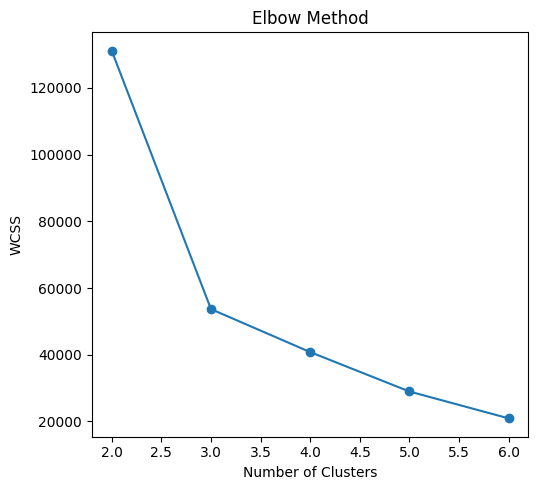

In [12]:
#using the elbow method to get the number of clusters
# wcss = within cluster sum of squares
geo_data = df_final.iloc[:,2:4]

k_range = range(2,7)
wcss_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(geo_data)
    wcss_values.append(kmeans.inertia_) 

#plotting the elbow method
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(k_range, wcss_values, marker ='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()

In [13]:
k = 3
kmeans = KMeans(n_clusters=k)

#method1
# kmeans.fit(geo_data)
# cluster_labels = kmeans.labels_

# clustered_data = np.column_stack((cluster_labels, df_final))
# print(clustered_data)

#method 2
kmeans.fit(geo_data)

identified_clusters = kmeans.fit_predict(geo_data)
clustered_data = df_final.copy()

clustered_data['Cluster'] = identified_clusters

df_final = df_final.drop(columns = ['longitude_gps', 'latitude_gps'], axis=1)
df_final.head(20)

c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,...,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0,10000.0,11500.0,15.0,2017-06-19 17:55:26,...,13000.0,30.0,Good,50.0,False,False,True,15.0,1.018611,15.0
1,1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0,10000.0,13000.0,30.0,2017-06-07 12:47:30,...,13000.0,30.0,Bad,38.0,False,False,True,32.0,1.018889,32.0
2,2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0,30000.0,36000.0,20.0,2017-06-08 11:49:34,...,13000.0,30.0,Good,37.0,False,False,True,32.0,1.001944,32.0
3,3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0,10000.0,11500.0,15.0,2017-06-15 14:05:26,...,11500.0,15.0,Good,32.0,False,False,True,33.0,1.018889,33.0
4,4,8a858e785acd3412015acd48f4920d04,GT Bank,1,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,41.0,False,False,True,NaN,NaN,NaN
5,5,8a858f045bc9690c015bca251e9a4e95,GT Bank,1,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,45.0,False,False,True,NaN,NaN,NaN
6,6,8a858ea05a859123015a8892914d15b7,Access Bank,1,4,5.0,70000.0,88000.0,30.0,2017-06-27 13:07:32,...,24500.0,30.0,Good,33.0,False,False,True,24.0,1.018889,24.0
7,7,8a858f275c451af5015c546a50ce55ed,GT Bank,1,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,37.0,False,False,True,NaN,NaN,NaN
8,8,8a858f405d13c45f015d13dd93ec0c1c,EcoBank,1,4,1.0,10000.0,13000.0,30.0,2017-07-05 22:09:14,...,13000.0,30.0,Good,31.0,False,False,True,16.0,1.003611,16.0
9,9,8a858f735c161bda015c164d86632026,EcoBank,1,4,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,59.0,False,False,True,NaN,NaN,NaN


Saving the new dataset

In [14]:
df_final.to_csv('Datasets/cleaned_dataset1_encoded.csv')